<a href="https://colab.research.google.com/github/antonelladamico17/Urban-Sound-Classification/blob/main/Urban_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Antonella D'Amico 961150*

**Machine Learing Project** \\
*Urban Sound Classification with Neural Networks*

## Data Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import librosa #python package for music and audio analysis
import matplotlib.pyplot as plt #we want to display the signals of one of the file
import IPython.display as ipd
import librosa.display
import seaborn

from tqdm import tqdm
import os

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() #label encoding

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_dataset_path = '/content/drive/MyDrive/UrbanSound8K/audio'

In [ ]:
# metadata file
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')

In this table we can see the file name, in which folder it is saved and the corresponding class. So, for example, audio file name `100032-3-0-0.wav` is classified as a dog bark.

In [ ]:
metadata.head(8752)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


Now we look at the distribution of the dataset, so we check if it is balanced or not.

In [ ]:
metadata['class'].value_counts()

drilling            1000
children_playing    1000
jackhammer          1000
air_conditioner     1000
dog_bark            1000
engine_idling       1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

As we see, we have 10 classes. Most of them are blanced since they contains 1000 samples or 929, on the other hand we have two of them which contain less than 500 samples. Only two classes are imbalanced beacuse of a smaller number of samples.

Text(0.5, 1.0, 'Metadata balancing/imbalancing')

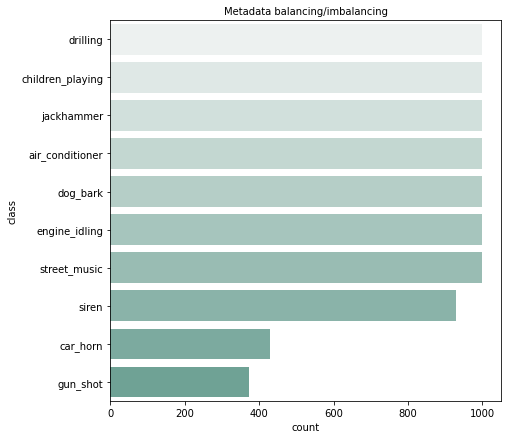

In [ ]:
plt.figure(figsize=(7,7))
seaborn.countplot(y = metadata['class'], 
                  palette= "light:#6A9",
                  order = metadata['class'].value_counts().index)
plt.title('Metadata balancing/imbalancing', fontsize=10)

In [ ]:
# child playing
ipd.Audio('/content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-21.wav')

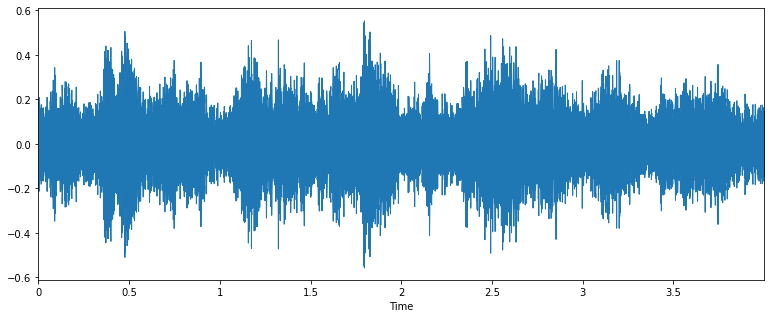

In [ ]:
plt.figure(figsize=(13,5))
data,sample_rate= librosa.load('/content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-21.wav')
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio('/content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-21.wav')

In [ ]:
sample_rate

22050

Now we need to extract features from the audio file (MFCC's features) and we need to do that for all the 8K audio.

In [ ]:
# extract MFCC's features from one audio file (function)
def extract_features(file_audio):
  audio, sr = librosa.load(file_audio, res_type='kaiser_fast')
  mfcc_f = librosa.feature.mfcc(y = audio, sr = sr, n_mfcc=40)
  mfcc_scaled_f = np.mean(mfcc_f.T, axis=0)
  return mfcc_scaled_f

we need to use fold 1,2,3,4,6 for training and fold 5,7,8,9,10 for testing

In [ ]:
# fold 1,2,3,4,6 for training
training = []

n = [1,2,3,4,6]

for i in n:
  for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path) + '/' + str('fold') + str(i) + '/', str(row["slice_file_name"]))
    if (str(row["fold"]) == str(i)):
      label_class = row["class"]
      data = extract_features(file_name)
      training.append([data, label_class])
      

8322it [12:14, 70.98it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [12:46, 11.39it/s]
8732it [12:46, 11.39it/s]
8732it [13:04, 11.13it/s]
8732it [14:10, 10.27it/s]
8732it [11:21, 12.82it/s]


In [ ]:
training_df=pd.DataFrame(training,columns=['features','class'])
training_df.head(5)

,features,class
0,"[-403.96762, 94.39807, 17.75182, -11.521064, -...",dog_bark
1,"[-368.11005, 128.74481, 28.91274, -21.190056, ...",dog_bark
2,"[-422.47903, 70.38347, 9.934862, 0.00061811326...",dog_bark
3,"[-260.24, 109.35181, -51.811283, -4.287414, -1...",dog_bark
4,"[-386.78485, 132.62961, 25.220676, 22.799538, ...",gun_shot


In [ ]:
training_df.shape

(4499, 2)

In [ ]:
test = []

m = [5,7,8,9,10]

for i in m:
  for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path) + '/' + str('fold') + str(i) + '/', str(row["slice_file_name"]))
    if (str(row["fold"]) == str(i)):
      label_class = row["class"]
      data = extract_features(file_name)
      test.append([data, label_class])

8732it [01:23, 104.76it/s]
8732it [01:15, 115.86it/s]
8732it [01:16, 114.52it/s]
8732it [06:00, 24.23it/s]
8732it [12:06, 12.03it/s]


In [ ]:
test_df = pd.DataFrame(test,columns=['features','class'])
test_df.head()

,features,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [ ]:
# Data splitting ( we need to spli features and class, both for training and test df)

X_train = np.array(training_df['features'].tolist())
Y_train = np.array(training_df['class'].tolist())

X_test = np.array(test_df['features'].tolist())
Y_test = np.array(test_df['class'].tolist())

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4499, 40), (4499,), (4233, 40), (4233,))

In [ ]:
Y_train #label class

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'street_music',
       'street_music', 'street_music'], dtype='<U16')

In [ ]:
# Label encoding, because label are categorical and we need a vector of 0,1 where 1 is related with the presence of that label
Y_train = to_categorical(labelencoder.fit_transform(Y_train))
Y_test = to_categorical(labelencoder.fit_transform(Y_test))

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Model creation

In [ ]:
# Check number of labels
num_labels = Y_train.shape[1]
print(num_labels)

10


#### fold separate

In [ ]:
fold5 = []
fold7 = []
fold8 = []
fold9 = []
fold10 = []

m = [5,7,8,9,10]
for i in m:
  for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path) + '/' + str('fold') + str(i) + '/', str(row["slice_file_name"]))
    if (str(row["fold"]) == str(i)):
      label_class = row["class"]
      data = extract_features(file_name)
      if (str(row["fold"]) == '5'):
        fold5.append([data, label_class])
      elif (str(row["fold"]) == '7'):
        fold7.append([data, label_class])
      elif (str(row["fold"]) == '8'):
        fold8.append([data, label_class])
      elif (str(row["fold"]) == '9'):
        fold9.append([data, label_class])
      elif (str(row["fold"]) == '10'):
        fold10.append([data, label_class])
    else:
      continue